# Analysis of ETC Data with ETH Training Data 

In [18]:
from Prediction import Prediction
from DataPreparation import DataPreparation
import pandas as pd
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [5]:
model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETH/slidingWindow/AutoencoderAutoencoderETHData6000Batch1Jun2021175934.h5',
                  )#compile = False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
with open('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETH/slidingWindow/AutoencoderETCslidMinVarmax100Epoch25May2021091859model_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/LSTM/TrainingonETH/slidingWindow/AutoencoderETCslidMinVarmax100Epoch25May2021091859weights_only.h5')

In [24]:
test = pd.read_csv('/Users/francaspeth/Google Drive/Masterarbeit/Share/ETC_block_2020_alldata.csv',
                   low_memory=False)
PrepTest = DataPreparation(test, timestep=10)
PrepTest.df.sort_values('number')
PrepTest.change_idx()
label_list = PrepTest.df['label'].tolist()
cols = ['num_tx', 'avg_tx_value', 'avg_nonce', 'size', 'difficulty',
       'total_difficulty', 'gas_limit', 'gas_used',
       'num_uncles', 'total_num_uncles', 'num_emptyblocks','dummy_miner_before','dummy_miner_count']
PrepTest.change_data_types(cols)

,num_tx,avg_tx_value,avg_nonce,size,difficulty,total_difficulty,gas_limit,gas_used,num_uncles,total_num_uncles,num_emptyblocks,dummy_miner_before,dummy_miner_count
1,8,3.430994e+18,7897.50,1548,1.677859e+14,8.230897e+20,8000029,7904833,0,571681,0,0,0
2,2,0.000000e+00,4980.00,765,1.678678e+14,8.230899e+20,8000029,7978617,0,571681,0,0,0
3,1,2.020142e+18,149.00,656,1.677858e+14,8.230901e+20,8003905,21000,0,571681,0,0,0
4,0,0.000000e+00,0.00,534,1.677858e+14,8.230902e+20,8000029,0,0,571681,0,0,0
5,0,0.000000e+00,0.00,534,1.677858e+14,8.230904e+20,8000029,0,0,571681,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201114,0,0.000000e+00,0.00,529,5.431082e+13,1.042400e+21,8039027,0,0,646110,10,1,0
2201115,0,0.000000e+00,0.00,1589,5.433733e+13,1.042400e+21,8031178,0,0,646110,11,0,1
2201116,1,2.327760e+15,7466.00,647,5.436387e+13,1.042400e+21,8023337,21000,0,646110,12,0,0
2201117,0,0.000000e+00,0.00,524,5.439041e+13,1.042400e+21,8015503,0,1,646111,0,0,0


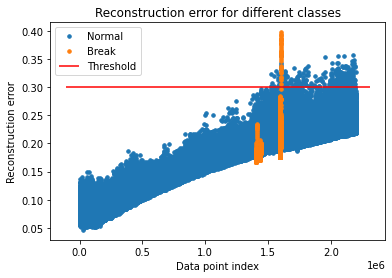

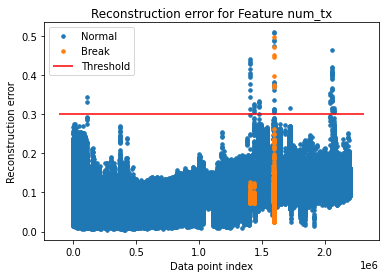

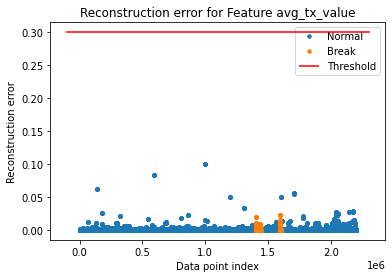

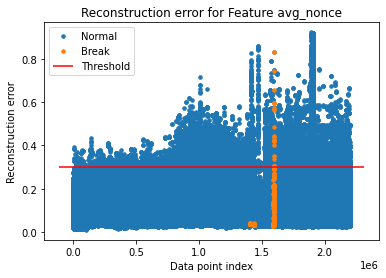

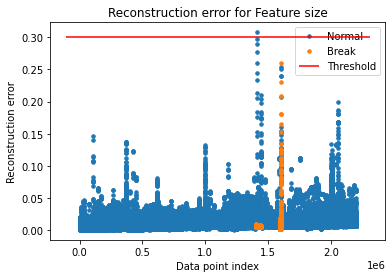

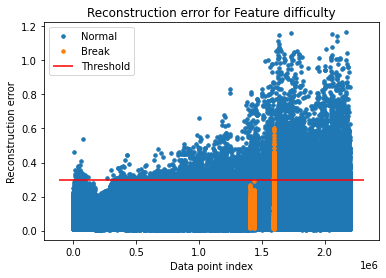

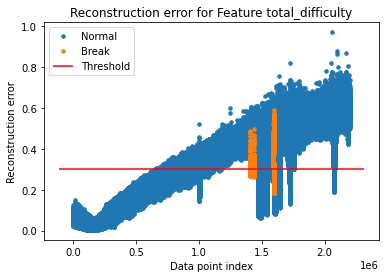

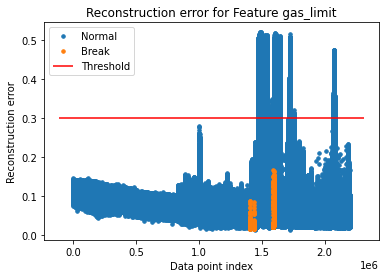

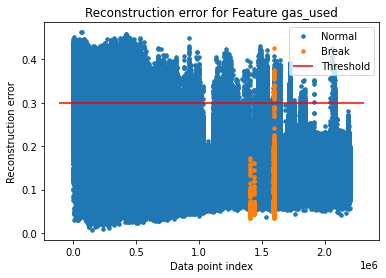

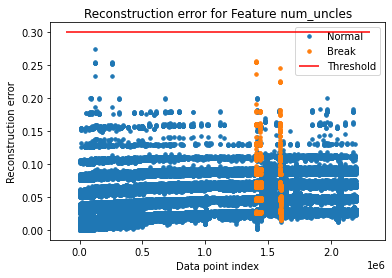

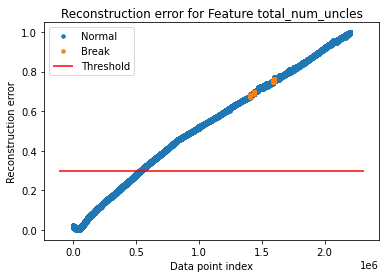

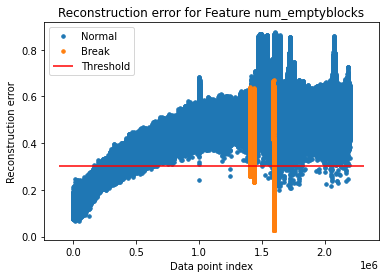

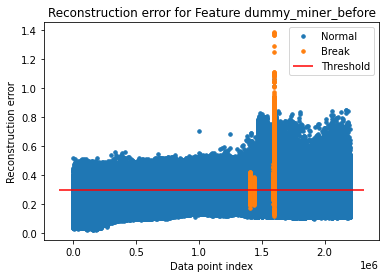

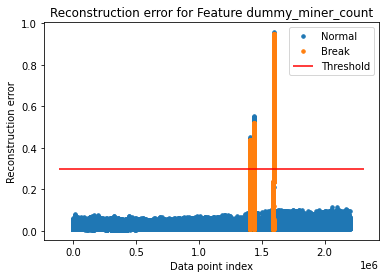

In [25]:
timestep=10
testp20 = PrepTest.transform_data()

Pred1 = Prediction(
    model = model,
    test = testp20
)
Pred1.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

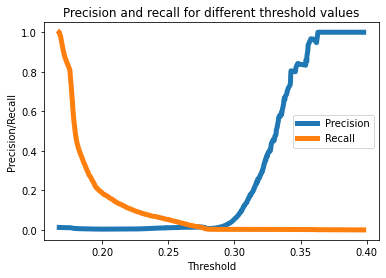

In [26]:
Pred1.plot_pr_diagram(label_list,timestep)

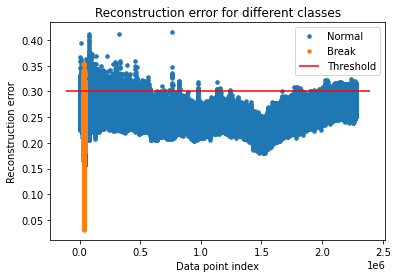

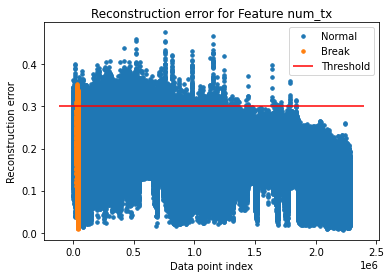

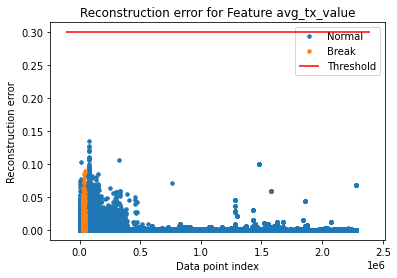

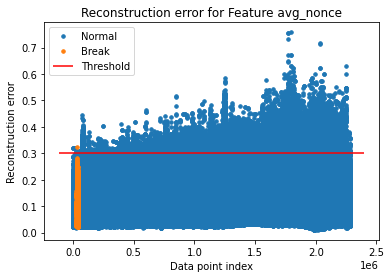

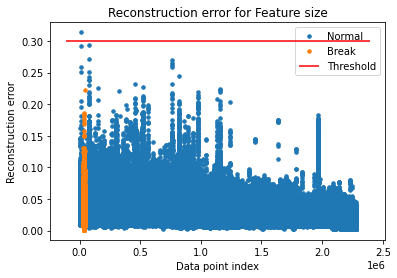

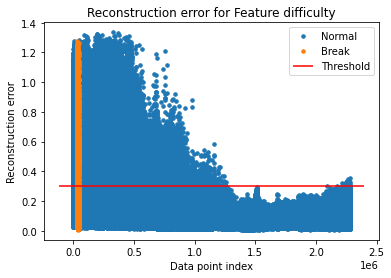

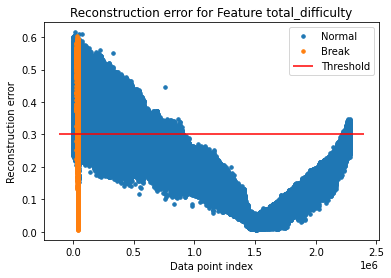

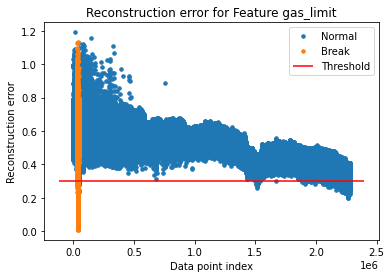

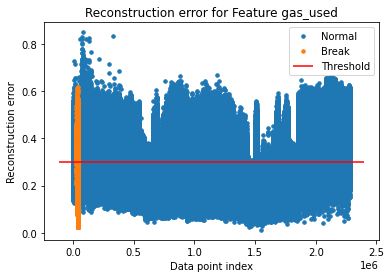

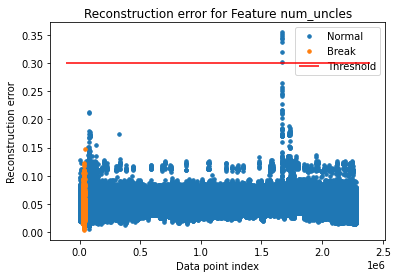

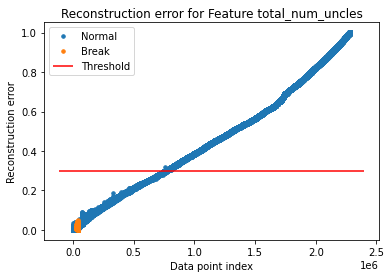

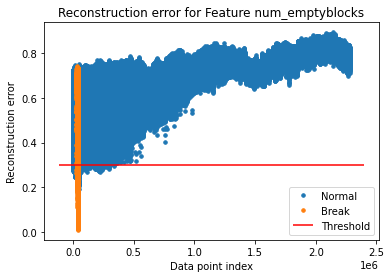

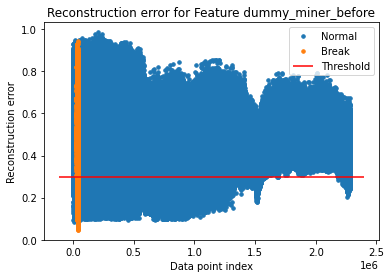

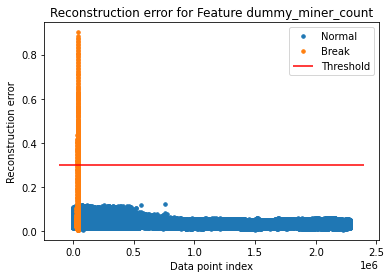

In [29]:
test = pd.read_csv('/Users/francaspeth/Google Drive/Masterarbeit/Share/final/ETC_block_2019_alldata.csv',
                   low_memory=False)
PrepTest = DataPreparation(test, timestep=10)
PrepTest.df.sort_values('number')
PrepTest.change_idx()
label_list = PrepTest.df['label'].tolist()
cols = ['num_tx', 'avg_tx_value', 'avg_nonce', 'size', 'difficulty',
       'total_difficulty', 'gas_limit', 'gas_used',
       'num_uncles', 'total_num_uncles', 'num_emptyblocks','dummy_miner_before','dummy_miner_count']
PrepTest.change_data_types(cols)
timestep=10
testp19 = PrepTest.transform_data()

Pred19 = Prediction(
    model = model,
    test = testp19
)
Pred19.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list[timestep:])
Pred1.plot_error_all_features(cols, label_list[timestep:])

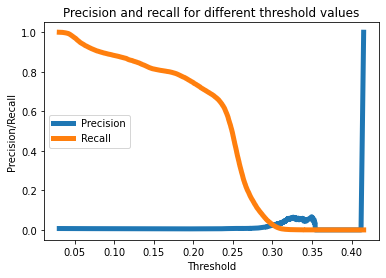

In [30]:
Pred19.plot_pr_diagram(label_list,timestep)